# Day 4: Applications of persistent homology

Today, we will explore some simple applications of persistent homology

## Computing distance between persistence diagrams

First, lets compute the bottleneck and Wasserstein distance between persistence diagrams. Use Gudhi to write two functions - one for computing bottleneck distance and another for computing Wasserstein distance. 

In [15]:
#!pip install POT # Provides the optimal transport module ot

In [18]:
# imports
import numpy as np
import gudhi
import ot
import tda

In [6]:
def compute_bottleneck(dgm1, dgm2):
    ''' Computes the bottleneck distance between two persistence diagrams

    Parameters:
        dgm1, dgm2: (N, 2) numpy array representing persistence points

    Returns:
        bottleneck distance 

    '''
    return gudhi.bottleneck_distance(dgm1,dgm2)
    

In [7]:
def compute_wasserstein(dgm1, dgm2):
    ''' Computes the Wasserstein distance between two persistence diagrams

    Parameters:
        dgm1, dgm2: (N, 2) numpy array representing persistence points

    Returns:
        Wasserstein distance 

    '''
    return gudhi.wasserstein.wasserstein_distance(dgm1,dgm2)
    

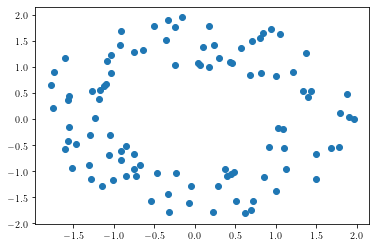

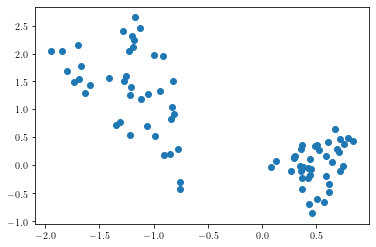

In [22]:
# TODO: try computing bottleneck and Wasserstein distance between a couple of persistence diagrams. 

dgm_annulus = tda.make_persist_points('/data/point-clouds/2D/annulus.npy')
dgm_triangles = tda.make_persist_points('/data/point-clouds/2D/triangles.npy')

def remove_inf_points(dgm):
    new_dgm = []
    for p in dgm:
        if p[1][1] != np.inf:
            new_dgm.append(p[1])
    return new_dgm

dgm1 = remove_inf_points(dgm_annulus)
dgm2 = remove_inf_points(dgm_triangles)

In [23]:
dist = compute_bottleneck(dgm1,dgm2)
print(dist)



0.37255826887598353


In [32]:
def load_and_clean_data(locations):
    dgms = []
    for loc in locations:
        dgms.append(tda.make_persist_points(loc))    

    def remove_inf_points(dgm):
        new_dgm = []
        for p in dgm:
            if p[1][1] != np.inf:
                new_dgm.append(p[1])
        return new_dgm

    clean_dgms = []
    for dgm in dgms:
        clean_dgms.append(remove_inf_points(dgm))

    if len(clean_dgms)>1:
        return clean_dgms
    else:
        return clean_dgms[0]

d12:0.37255826887598353, d23:0.13551598371751328, d13:0.2884847523138083


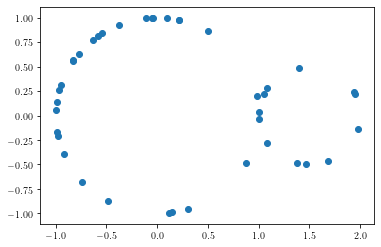

In [33]:

dgm3 = load_and_clean_data(['/data/point-clouds/2D/two-circles.npy'])

d12 = compute_bottleneck(dgm1,dgm2)
d23 = compute_bottleneck(dgm2,dgm3)
d13 = compute_bottleneck(dgm1,dgm3)

print(f"d12:{d12}, d23:{d23}, d13:{d13}")

Let $\pi: \mathbb{R}^2 \to \mathbb{R}^2$ be the projection of any point onto the diagonal. Then, given two persistence diagrams, $P$ and $Q$:

(1) show that the Wasserstein distance between $P \cup \pi(Q)$ and $Q \cup \pi(P)$ is the same the Wasserstein distance between $P$ and $Q$. 

(2) Use [Python OT](https://pythonot.github.io/index.html) to implement this alternate Wasserstein distance computation between $P$ and $Q$.

In [ ]:
def projection_to_diagonal(P):
    ''' Computes projection of a point set in \R^2 to the diagonal 

    Parameters:
        P: point set in \R^2 formatted as (N, 2) np.array 

    Returns:
        (N, 2) np.array of points on diagonal

    '''
    raise NotImplementedError('Please implement')

In [ ]:
def compute_wasserstein_alternate(dgm1, dgm2):
    ''' Computes the Wasserstein distance between two persistence diagrams

    Parameters:
        dgm1, dgm2: (N, 2) numpy array representing persistence points

    Returns:
        Wasserstein distance 

    '''
    raise NotImplementedError('Please implement')

## Point cloud classification using persistence diagrams 

Now, let's try doing some point cloud classification using persistence diagrams. We can do this in three steps: 
(1) we will compute persistence diagrams for our point cloud dataset. 
(2) we will compute the bottleneck/Wasserstein distance between each pair of persistence diagrams.   
(3) we will use the sklearn k-nearest neighbor classifier to do point cloud classification. 
    
We will be working with the ModelNet40 point cloud dataset. The training point clouds/labelsare in the `day3/train` folder and the testing point clouds/labels are in the `day3/test` folder. Additionally, I've written the classifier already for you so all you need to do is step 1 and 2 and input the computed distance matrices in the correct places. 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3
# TODO: compute X_train, should be of shape (N_train, N_train)
X_train = None
# TODO: compute Y_train, should be shape (N_train, )
Y_train = None

# TODO: compute X_test, should be of shape (N_test, N_train)
X_test = None
# TODO: compute Y_test, should be shape (N_test, )
Y_test = None

neigh = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

neigh.fit(X_train, Y_train)

predictions = neigh.predict(X_test)

print("Classification accuracy:", accuracy_score(Y_test, predictions))